In [ ]:
- title: Занятие 3
- author: Kononov Dmitrij
- date: 2025-02-20
- test_link: https://cs.mipt.ru:44367/cgi-bin/new-client?contest_id=10203
- test_comment: Задание №2
- slug: s2_lab03
- ipynb_url: download/s2_lab03.ipynb

# Занятие 3: Графы — основные определения, обход графов в ширину.

## Цель: Повторить на практике основные определения теории графов, освоить на практике алгоритм обхода в ширину, а также научиться использовать библиотеку визуализации NetworkX.

# Повторить
1. Определение понятия граф, вершины, ребра, матрица смежности, ориентрованный и не ориентированный граф.
2. Обобщенный алгоритм поиска.
3. Поиск в ширину.
4. Поиск длины кратчайшего пути при помощи поиска в ширину.

# Основные определения
**Графом** называется конечное множество вершин и множество ребер. Каждому ребру сопоставлены две вершины – концы ребра.

В **ориентированном графе**  одна вершина считается начальной, а другая – конечной.

Если некоторое ребро u соединяет две вершины A и B графа, то говорят, что ребро u **инцидентно** вершинам A и B, а вершины в свою очередь инцидентны ребру u.

Вершины, соединенные ребром, называются **смежными**.

Ребра называются **кратными**, если они соединяют одну и ту же пару вершин (а в случае ориентированного графа – если у них совпадают начала и концы). 

Ребро называется **петлей**, если у него совпадают начало и конец. 

**Степенью вершины** в неориентированном графе называется число инцидентных данной вершине ребер (при этом петля считается два раза, то есть степень - это количество «концов» ребер, входящих в вершину). 

**Путем** на графе называется последовательность ребер, в которой конец одного ребра является началом следующего ребра. Начало первого ребра называется началом пути, конец последнего ребра - концом пути.

Если начало и конец пути совпадают, то такой путь называется **циклом**.

Путь, который проходит через каждую вершину не более одного раза называется **простым путем**. Аналогично определяется **простой цикл**.

Граф называется **связным**, если между любыми двумя его вершинами есть путь.

Если граф несвязный, то его можно разбить на несколько частей (подграфов), каждая из которых будет связной. Такие части называются **компонентами связности**. 

**Деревом** называется связный граф не содержащий простых циклов.


## Способы представления графов в памяти
### Матрица смежности
При представлении графа **матрицей смежности** информация о ребрах графа хранится в квадратной матрице (двумерном списке), где элемент `A[i][j]` равен `1`, если ребра `i` и `j` соединены ребром и равен `0` в противном случае.

Если граф неориентированный, то матрица смежности всегда симметрична относительно главной диагонали.

**Задание 1** Напишите код, заполняющий матрицу смежности для графа, представленного на рисунке ниже (нумерацию вершин задайте самостоятельно)

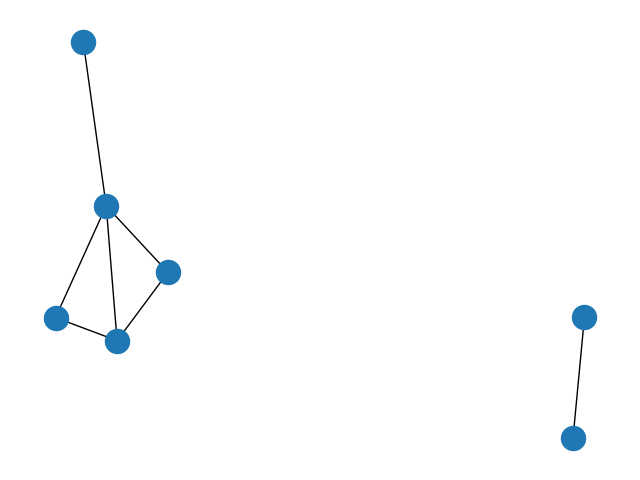

### Список смежности
При представлении графа списками смежности для каждой вершины `i` хранится список `W[i]` смежных с ней вершин.
Например, для графа выше:
``` python
W[0] = [1, 2]
W[1] = [0, 2]
W[2] = [0, 1, 2]
```
Таким образом, весь граф можно представить одним списком, состоящим из вложенных списков смежности вершин.

``` python
W = [[1, 2], [0, 2], [0, 1, 2]]
```
В таком способе удобно перебирать ребра, выходящие из вершины `i` (это просто список `W[i]`), но сложно проверять наличие ребра между вершинами `i` и `j` – для этого необходимо проверить, содержится ли число `j` в списке `W[i]`. 

Но в языке *Python* можно эту часть сделать более эффективной, если заменить списки на множества – тогда проверка существования ребра между двумя вершинами также будет выполняться за `О(1)`. 

**Задание 2** — В ячейке ниже реализуйте код, который строит список смежности на основе множеств из матрицы смежности, графа из задания 1. Проверьте в коде существование ребер между вершинами графа, изображенного выше. Для каждой пары вершин, между которыми существует ребро, выведите **True** и **False** в противном случае.

### Взвешенные графы
Очень часто рассматриваются графы, в которых каждому ребру приписана некоторая числовая характеристика — вес. Соответствующие графы называются взвешенными.

При представлении графа матрицей смежности вес ребра можно хранить в матрице, то есть `A[i][j]` в данном случае будет равно весу ребра из `i` в `j`. При этом при отсутствии ребра можно хранить специальное значение, например, `None`.

При представлении графа списками смежности можно поступить двумя способами. Можно в списках смежности хранить пару (кортеж) из двух элементов – номер конечной вершины и вес ребра. Но в этом случае неудобно проверять наличие ребра между двумя вершинами.

Другой способ – хранить списки смежности как ранее, а веса ребер хранить в отдельном ассоциативном массиве (`dict` в **Python**), в котором ключом будет пара из двух номеров вершин (номер начальной и конечной вершины), а значением будет вес ребра между этими вершинами.

# Библиотека NetworkX для визуального представления графов
При решении задач контеста удобным инструментом для визуализации графов из примеров является библитотека NetworkX.

Установка библиотеки:
``` python
pip install networkx
```

Подключение библиотеки:

``` python
import networkx as nx
```

NetworkX предназначена для изучения структуры, динамики и функционирования сложных сетей. Она позволяет создавать и хранить графы в стандартных и нестандартных форматах, генерировать много типов случайных и классических графов, анализировать их структуру, строить сетевые модели и создавать новые алгоритмы.

Документация на библиотеку находится по [адресу](https://networkx.org/documentation/stable/).

## Классы графов

NetworkX содержит четыре класса графов:

-   Graph — граф без кратных рёбер (петли допустимы)
-   DiGraph — ориентированный граф без кратных рёбер (петли допустимы)
-   MultiGraph — граф с кратными рёбрами (в том числе с кратными
    петлями)
-   MultiDiGraph — ориентированный граф с кратными рёбрами (в том
    числе с кратными петлями)

Внутреннее представление графов реализовано в виде списков смежности (словарь словарей словарей). Однако во избежании появления несогласованности, все операции с графами должны производится с использованием API функций библиотеки.

## Вершины и рёбра

Вершиной может быть любой неизменяемый тип с вычислимой функцией *hash()*. 

Например, подойдут соедующие типы **Python**:

-   str
-   int
-   float
-   кортеж из строк и чисел
-   frozenset (неизменяемое множество)

Рёбра представляют собой связь двух вершин и чаще вершины имеют привязанные к ним данные — свойства рёбер. Для указания веса ребра, используйте свойство **weight**.

## Создание графа

Графы могут быть созданы тремя основными способами:

-   явное добавление узлов и рёбер

``` python
G = nx.Graph()                                    # создаём экземпляр графа
G.add_edge(1, 2)                                  # ребро добавляется сразу со своими вершинами
G.add_edge(2, 3)                                  # стандартный вес ребра weight=1
G.add_edge(3, 4, weight = 0.9)                    # можно задать weight сразу при создании ребра
G.add_node(5)                                     # изолированный узел можно добавить отдельно
G.add_node(6, x = 1.5, y = -5.0, data = ['any'])  # и сразу задать ему любые свойства
```

-   генераторами графов --- алгоритмами порождения стандартных сетевых
    топологий

``` python
G = nx.complete_graph(10)    # полносвязный граф с 10 вершинами
G = nx.path_graph(10)        # 10 узлов, расположенных "в линеечку"
G = nx.cycle_graph(10)       # 10 узлов, связанных кольцом
G = nx.star_graph(5)         # звезда с 1 узлом в середине и 5 узлами-лучами
G = nx.balanced_tree(2, 3)   # сбалансированное двоичное дерево высоты 3
G = nx.empty_graph(10)       # граф с 10 вершинами без рёбер
```

-   импорт данных графа из некоторого формата (обычно из файла)

``` python
d = {0: {1: {'weight': 10}, 2: {'weight': 20}},
     1: {0: {'weight': 10}, 3: {'weight': 30}},
     2: {0: {'weight': 20}},
     3: {1: {'weight': 30}}}
G = nx.Graph(d)
dd = nx.to_dict_of_dicts(G) # d == dd
```

## Визуализация графа

Визуализация графов --- нетривиальная задача! Существует много полноценных библиотек, предназначенных именно для этого: Cytoscape, Gephi, Graphviz или PGF/TikZ для LaTeX. Для их использования можно экспортировать граф из NetworkX в формат GraphML.

Однако, есть и самый простой способ визуализации, встроенный в саму библиотеку NetworkX, при подключении библиотеки
*matplotlib.pyplot*.

``` python
nx.draw(G)           # отобразить граф при помощи Matplotlib
nx.draw_circular(G)  # Использовать расположение circular layout
nx.draw_random(G)    # Использовать расположение random layout
nx.draw_spectral(G)  # Использовать расположение spectral layout
nx.draw_spring(G)    # Использовать расположение spring layout
nx.draw_shell(G)     # Использовать расположение shell layout
nx.draw_graphviz(G)  # Использовать graphviz для расположения вершин
```
Перед выполнением примера ниже не забудьте установить библиотеку *matplotlib*:
``` python
pip install -U matplotlib
```

### Пример визуализации графа №1
Выполните приведенный ниже пример в ячейке *code*

``` python
import matplotlib.pyplot as plt
import networkx as nx

G=nx.path_graph(8)
nx.draw(G)
plt.savefig("simple_path.png") # сохранить как png файл
plt.show() # вывести на экран
```

### Пример визуализации графа №2

Пример добавления этикеток на вершины и подкрашивания рёбер:

``` python
"""
Отрисовка графа через matplotlib, с разными цветами.

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""

import matplotlib.pyplot as plt
import networkx as nx

G=nx.cubical_graph()
pos=nx.spring_layout(G) # позиции всех вершин

# вершины
nx.draw_networkx_nodes(G, pos,
                   nodelist=[0,1,2,3], # список вершин
                   node_color='r',     # красный цвет
                   node_size=500,      # размер
               alpha=0.8)              # прозрачность
nx.draw_networkx_nodes(G, pos,
                   nodelist=[4,5,6,7],
                   node_color='b',
                   node_size=500,
               alpha=0.8)

# рёбра
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5) # все рёбра
nx.draw_networkx_edges(G, pos,
                   edgelist=[(0,1),(1,2),(2,3),(3,0)],
                   width=8, alpha=0.5, edge_color='r')   # красные рёбра
nx.draw_networkx_edges(G, pos,
                   edgelist=[(4,5),(5,6),(6,7),(7,4)],
                   width=8, alpha=0.5, edge_color='b')   # синие рёбра

# добавим математические названия вершин
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.savefig("labels_and_colors.png") # сохранить как png картинку
plt.show() # вывести на экран
```
Выполните пример в ячейке ниже.

#### Пример визуализации графа №3

Ещё один пример добавления этикеток на вершины и подкрашивания рёбер:

``` python
"""
Пример использования Graph как взешенного.
"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""

import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

#   добавляем рёбра и вершины

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]  # "тяжёлые"
esmall = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5] # "лёгкие"

pos = nx.spring_layout(G) # позиции всех вершин

# вершины
nx.draw_networkx_nodes(G, pos, node_size=700)

# рёбра
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                width=6)                                   # "тяжёлые"
nx.draw_networkx_edges(G, pos, edgelist=esmall,
       width=6, alpha=0.5, edge_color='b', style='dashed') # "лёгкие"

# метки
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # сохранить как png картинку
plt.show() # вывести на экран
```

## Алгоритм обхода в ширину
**Алгоритм обхода в ширину** (англ. `breadth-first search`, `BFS`) позволяет найти кратчайшие пути из одной вершины невзвешенного (ориентированного или неориентированного) графа до всех остальных вершин. Под кратчайшим путем подразумевается путь, содержащий наименьшее число ребер.

Алгоритм построен на простой идее — пусть до какой-то вершины `u` найдено кратчайшее расстояние и оно равно `d`, а до вершины `v` кратчайшее расстояние не меньше, чем `d`. Тогда если вершины `u` и `v` – смежны, то кратчайшее расстояние до вершины `v` равно `d+1`.

Через `d[i]` будем обозначать кратчайшее расстояние до вершины `i`. Пусть начальная вершина имеет номер `s`, тогда `d[s]=0`. Для всех вершин смежных с `s` расстояние равно `1`, для вершин, смежных с теми, до которых расстояние равно `1`, расстояние равно `2` (если только оно не равно 0 или 1) и т. д.

Таким образом, организовать процесс вычисления кратчайших расстояний до вершин можно следующим образом. Для каждой вершины в массиве `d` будем хранить кратчайшее расстояние до этой вершины, если же расстояние неизвестно — будем хранить значение  `None`. В самом начале расстояние до всех вершин равно `None`, кроме начальной вершины, до которой расстояние равно `0`. Затем перебираем все вершины, до которых расстояние равно `0`, перебираем смежные с ними вершины и для них записываем расстояние равное `1`. Затем перебираем все вершины, до которых расстояние равно `1`, перебираем их соседей, записываем для них расстояние, равное `2` (если оно до этого было равно `None`). Затем перебираем вершины, до которых расстояние было равно 2 и тем самым определяем вершины, до которых расстояние равно `3` и т. д. Этот цикл можно повторять либо пока обнаруживаются новые вершины на очередном шаге, либо `n−1` раз (где `n` – число вершин в графе), так как длина кратчайшего пути в графе не может превосходить `n−1`.

Такая реализация алгоритма будет неэффективной, если на каждом шаге перебирать все вершины, отбирая те, которые были обнаружены на последнем шаге. Для эффективной реализации следует использовать очередь.

В очередь будут закладываться вершины после того, как до них будет определено кратчайшее расстояние. То есть очередь будет содержать вершины, которые были «обнаружены» алгоритмом, но не были рассмотрены исходящие ребра из этих вершин. Можно также сказать, что это очередь на «обработку» вершин.

Из очереди последовательно извлекаются вершины, рассматриваются все исходящие из них ребра. Если ребро ведет в не обнаруженную до этого вершину, то есть расстояние до новой вершины не определено, то оно устанавливается равным на единицу больше, чем расстояние до обрабатываемой вершины, а новая вершина добавляется в конец очереди.

Таким образом, если из очереди извлечена вершина с расстоянием `d`, то в конец очереди будут добавляться вершины с расстоянием `d+1`, то есть в любой момент исполнения алгоритма очередь состоит из вершин, удаленных на расстояние `d`, за которыми следуют вершины, удаленные на расстояние `d+1`:
``` python
D = [None] * n
D[start] = 0
Q = [start]
Qstart = 0
while Qstart < len(Q):
    u = Q[Qstart]
    Qstart += 1 
    for v in g[u]: 
        if D[v] is None: 
            D[v] = D[u] + 1 
            Q.append(v)
```
В этом алгоритме `n` — число вершин в графе, пронумерованных от `0` до `n-1`. Номер начальной вершины (от которой ищутся пути) хранится в переменной `start`. `Q` — очередь, в которой хранятся обрабатываемые элементы (`Qstart` — первый элемент очереди, добавление новой вершины в конец очереди — это вызов метода `append` для списка, удаление вершины из начала очереди — это увеличение `Qstart` на 1 (при этом первый элемент в очереди хранится в `Q[Qstart]`)).

В самом начале в очередь добавляется только один элемент `start`, для которого в самом начале определено расстояние `D[start] = 0` (для всех остальных элементов расстояние не определено). Цикл продолжается пока очередь не пуста (проверяется условием `Qstart < len(Q)`). В цикле из очереди удаляется первый элемент `u`. Затем перебираются все смежные с ним вершины `v`. Если вершина `v` не была обнаружена ранее, что проверяется при помощи условия `D[v] is None`, то расстояние до вершины `v` устанавливается равным расстоянию до вершины `u`, увеличенному на 1, затем вершина v добавляется в конец очереди.

**Задание 3** — Для графа из задания 1 реализуйте алгоритм обхода в ширину и выведите на экран расстояние от стартовой вершины до всех достижимых из неё. Выполните задание для двух произвольных стартовых вершин. 

**Задание 4** — Для графа из задания 1 с помощью алгоритма поиска в ширину найдите все компоненты связности графа.